# Task 1: Prediction using Supervised ML
  
  Author: Lakshita Bansal
  


### Importing Library 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Importing Dataset

In [15]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Given Dataset:")
data.head(25)

Given Dataset:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Analysis and Visualisation 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


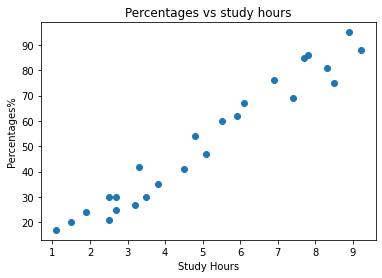

In [23]:
plt.scatter(x = data.Hours, y = data.Scores)
plt.title("Percentages vs study hours")
plt.xlabel("Study Hours")
plt.ylabel("Percentages%")
plt.show()

From the above graph, we can see that study hours and percentages have a positive linear relationship which means that if number of study hours increases then percentages will also increase.

### Preparing the Data

In [25]:
X = data.iloc[:, :-1].values
Y = data.iloc[:,1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Training the model

In [28]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
print("Data Training Completed")

Data Training Completed


Plotting Regression Line:

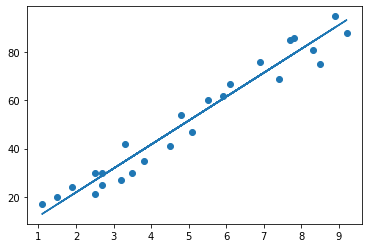

In [31]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making Predictions


In [36]:
print("Study Hours \n",X_test)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual score':Y_test, 'Predicted score':y_pred})
df

Study Hours 
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


,Actual score,Predicted score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [57]:
# predicted score if given that a student studies for 9.25 hours a day
hours = 9.25
given_pred = round(regressor.predict([[9.25]]) [0],2)
print("Number of hours = {}".format(hours))
print("Predicted score = {}".format(given_pred))

Number of hours = 9.25
Predicted score = 93.89


Evaluating the model

In [59]:
print('Mean Asolute Erro: ', metrics.mean_absolute_error(Y_test,y_pred))

Mean Asolute Erro:  4.130879918502486
